In [1]:
#load packages
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import pandas as pd
import soundfile as sf

In [4]:
#load the saved model 
json_file = open('NN_108-56-5.json', 'r')
loaded_model_json = json_file.read()
loaded_model = keras.models.model_from_json(loaded_model_json)

#load weights
loaded_model.load_weights("NN_108-56-5_weights.h5")

In [5]:
#load test data
path = 'x:/Steering/Recordings/Processed/'
testX = np.load(path + 'TestX_NN_108-56-5.npy')
testY = np.load(path + 'TestY_NN_108-56-5.npy')
one_hot_test = np.load(path + 'OneHot_testY_108-56-5.npy')

In [6]:
testY

array([4, 4, 4, ..., 2, 4, 2], dtype=int64)

In [7]:
loaded_model.compile(loss='mean_squared_error',
    optimizer='Adam',
           metrics=['categorical_accuracy'])

In [8]:
loaded_model.evaluate(testX,one_hot_test,verbose=1)

212005/212005 [==============================] - 2s 10us/step


[0.04782811622189045, 0.8409141293840221]

In [9]:
#process weights
weights_first_layer = loaded_model.layers[0].get_weights()[0]
biases_first_layer = loaded_model.layers[0].get_weights()[1]

weights_second_layer = loaded_model.layers[1].get_weights()[0]
biases_second_layer = loaded_model.layers[1].get_weights()[1]


In [10]:
weights_first_layer = np.vstack([biases_first_layer, weights_first_layer])
weights_second_layer = np.vstack([biases_second_layer, weights_second_layer])


In [11]:
weights_first_layer_norm = weights_first_layer / abs(weights_first_layer).max()
#biases_first_layer_norm = biases_first_layer / abs(biases_first_layer).max()

weights_second_layer_norm = weights_second_layer / abs(weights_second_layer).max()
#biases_second_layer_norm = biases_second_layer / abs(biases_second_layer).max()


In [12]:
weights_first_layer_norm.shape, weights_second_layer_norm.shape

((109, 56), (57, 5))

In [13]:
abs(weights_first_layer).max(), abs(weights_second_layer).max()

(122.67212, 21.081203)

In [14]:
np.savetxt('weights_first_layer_norm_NN_108-56-5.txt',weights_first_layer_norm,delimiter= ',')
np.savetxt('weights_second_layer_norm_NN_108-56-5.txt',weights_second_layer_norm,delimiter= ',')


In [15]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cfm = confusion_matrix(testY,loaded_model.predict_classes(testX)) 

In [16]:
cfm

array([[    0,     0,     0,     0,     0,     0],
       [17961,   248,     4,  1840,   891,     0],
       [  216, 70922,     6,  1808,   328,     0],
       [    3,    26, 23535,    21,    77,     0],
       [ 1493, 12001,    16, 35821,  5865,     0],
       [  704,  1279,    86,  6815, 30039,     0]], dtype=int64)

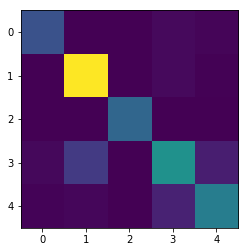

In [17]:
plt.imshow(cfm[1:,:-1])

In [18]:
a = [0 for x in range(5)]
cfm_norm = np.zeros((5,5))#[[0 for x in range(5)] for y in range(5)]

In [19]:
for idx in range(5):
    cfm_norm[idx,:] = cfm[idx+1,:-1] / sum(cfm[idx+1,:-1]) #len(testY[testY == idx + 1])      

In [20]:
cfm_norm, a

(array([[8.57572574e-01, 1.18411001e-02, 1.90985485e-04, 8.78533231e-02,
         4.25420168e-02],
        [2.94759825e-03, 9.67822052e-01, 8.18777293e-05, 2.46724891e-02,
         4.47598253e-03],
        [1.26785563e-04, 1.09880822e-03, 9.94632744e-01, 8.87498943e-04,
         3.25416279e-03],
        [2.70490615e-02, 2.17425176e-01, 2.89876078e-04, 6.48978187e-01,
         1.06257700e-01],
        [1.80869923e-02, 3.28597487e-02, 2.20949053e-03, 1.75089279e-01,
         7.71754490e-01]]), [0, 0, 0, 0, 0])

In [21]:
cfm_norm = np.around(cfm_norm,decimals=3)

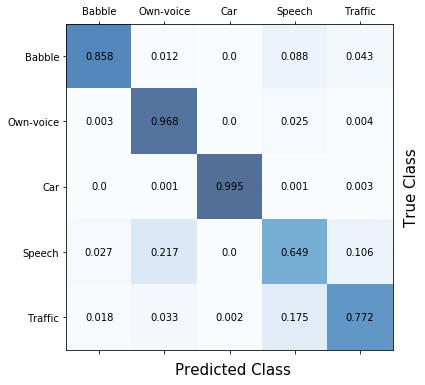

In [22]:
#nicer confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cfm_norm,cmap=plt.cm.Blues,alpha=0.7)

for i in range(cfm_norm.shape[0]):
    for j in range(cfm_norm.shape[1]):
        ax.text(x=j,y=i, s=cfm_norm[i,j],va='center', ha= 'center')

ax.set_xticks([0,1,2,3,4])
ax.set_yticks([0,1,2,3,4])
ax.set_xticklabels(['Babble','Own-voice','Car','Speech','Traffic'])
ax.set_yticklabels(['Babble','Own-voice','Car','Speech','Traffic'])
ax.yaxis.set_label_coords(1.08,0.5)
ax.xaxis.set_label_coords(0.51,-0.04)
ax.set_xlabel('Predicted Class',fontsize=15)
ax.set_ylabel('True Class',fontsize=15)
plt.show()


In [23]:
fig.savefig('Conf_Matrix_ERB=2.png',dpi=100)

In [24]:
sum(cfm_norm[4,:])

1.0